In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = '자동차등록대수현황_시도별_20230410201011.csv'
pd_data = pd.read_csv(file , encoding = 'cp949', header = [1,2])
pd_data.drop(('시도명(1)', '시도명(1)'), axis = 1, inplace= True)
pd_data.head()

시군구(1)   승용               승합              화물               특수           
  시군구(1)   관용    자가용   영업용  관용   자가용  영업용   관용    자가용   영업용  관용  자가용   영업용
0    금정구   96  66781  2555  62  2193  784  102   9785  3229  14  172   665
1    기장군   80  70924   795  54  2181  546  117  10742  1133  11  208   207
2     남구  104  79389  2848  62  2192  426   54   9127  4639   3  282  1543
3     동구   83  37106  1900  48   911  180   60   3608  2544   4   96  1060
4    동래구   81  84943  1494  29  2063  367   66  10196  1478   1  187   256

In [3]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [4]:
pd_data.set_index(('시군구(1)', '시군구(1)'), inplace = True)

In [5]:
pd_data.index.name = '지역구'

/tmp/ipykernel_3499/2769163817.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe[0,0].set_xticklabels(xs.index, rotation = 45)
/tmp/ipykernel_3499/2769163817.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe[1,1].set_xticklabels(xs.index, rotation = 45)


([<matplotlib.patches.Wedge at 0x7faf5f6645b0>,
 [Text(1.0777815481850643, 0.21997030343163557, '금정구'),
  Text(0.925832150663022, 0.5939990141394877, '기장군'),
  Text(0.6341844560362387, 0.8987825519679498, '남구'),
  Text(0.2425234036633339, 1.0729316840673275, '동구'),
  Text(-0.13347113318762122, 1.0918724543670897, '동래구'),
  Text(-0.5881623730985354, 0.9295509791674148, '부산진구'),
  Text(-0.9475903705258929, 0.5586344866606441, '북구'),
  Text(-1.0888334126085633, 0.15633873348338936, '사상구'),
  Text(-1.0636051837924627, -0.28061363653572075, '사하구'),
  Text(-0.9066912144971969, -0.6228250489130942, '서구'),
  Text(-0.7316902150725914, -0.8213582830695904, '수영구'),
  Text(0.02726150461652949, -1.2997141264008958, '연제구'),
  Text(0.8182820593200567, -0.7351288808058947, '영도구'),
  Text(1.1543122241851815, -0.3279684269814079, '해운대구')],
 [Text(0.5878808444645806, 0.1199838018718012, '6.4%'),
  Text(0.5049993549071029, 0.3239994622579024, '5.3%'),
  Text(0.3459187942015847, 0.49024502834615435, '6.9%'

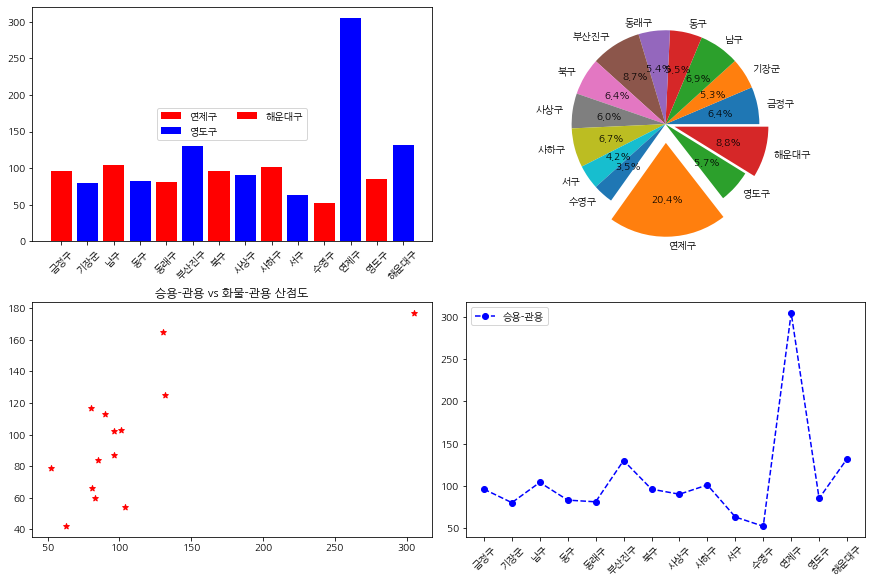

In [13]:
xs = pd_data[('승용', '관용')]
ys = pd_data[('화물', '관용')]

# figure 설정
fig, axe = plt.subplots(2,2, figsize = (12,8), layout ='constrained')
# layout에는 None = 기본값
# layout에는 constrained
# layout에는 tight

# bar차트 
axe[0,0].bar(xs.index, xs, color = ['r', 'b'], label = xs.index)
axe[0,0].set_xticklabels(xs.index, rotation = 45)
axe[0,0].legend(['연제구','영도구', '해운대구'], loc = 'center', ncols = 2)

# scatter 차트
axe[1,0].scatter(xs, ys, marker = '*', c = 'r')
axe[1,0].set(title = '승용-관용 vs 화물-관용 산점도')

# plot 차트
axe[1,1].plot(xs.index, xs, 'bo--', label = '승용-관용')
axe[1,1].set_xticklabels(xs.index, rotation = 45)
axe[1,1].legend()


#explode를 위한 list
ex_array = np.zeros(len(xs.index))
ex_array[-3] = 0.2 # (연제구)중심점에서 부터 얼마나 많이 떨어져 나올지 하는 숫자
ex_array[-1] = 0.1 # (해운대구)

# pie차트
axe[0,1].pie(xs, labels = xs.index, autopct='%1.1f%%', explode = ex_array) # % 표시를 하고 싶으면 %%두번 찍어줘야한다.
#axe[0,1].legend()

In [26]:
df2 = pd_data.stack(level=0).reset_index()
filter1 = df2['지역구'] == '기장군'
df3 = df2.loc[filter1, :]
#df3['color'] = pd.Series(['red', 'green', 'blue', 'yellow']) 이렇게해서 color에 넣는 방법도 있다.
df3

/tmp/ipykernel_3499/1391698207.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['color'] = pd.Series(['red', 'green', 'blue', 'yellow'])


,지역구,level_1,관용,영업용,자가용,color
4,기장군,승용,80,795,70924,NaN
5,기장군,승합,54,546,2181,NaN
6,기장군,특수,11,207,208,NaN
7,기장군,화물,117,1133,10742,NaN


([<matplotlib.patches.Wedge at 0x7faf5eeb9cf0>,
 [Text(-0.9701636828617771, 0.5184423096701054, ''),
  Text(0.6837383318386443, -0.8616854957433762, ''),
  Text(0.7578521661762381, -0.797282944895966, ''),
  Text(1.0125290583823954, -0.4298661488548031, '')])

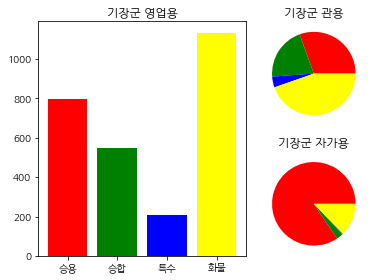

In [27]:
fig = plt.figure(layout = 'tight')

axe1 = fig.add_subplot(121)
axe1.set_title('기장군 영업용')
axe1.bar(df3['level_1'], df3['영업용'], color =['red', 'green', 'blue', 'yellow'] )

axe2 = fig.add_subplot(222)
axe2.set_title('기장군 관용')
axe2.pie(df3['관용'], colors = ['red', 'green', 'blue', 'yellow'])

axe3 = fig.add_subplot(224)
axe3.set_title('기장군 자가용') 
axe3.pie(df3['자가용'], colors = ['red', 'green', 'blue', 'yellow'])